## Условие 1:
* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

### 1.1
Данные из прошлого ДЗ

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('kc_house_data.csv', sep = ',')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2
Изучите стоимости недвижимости

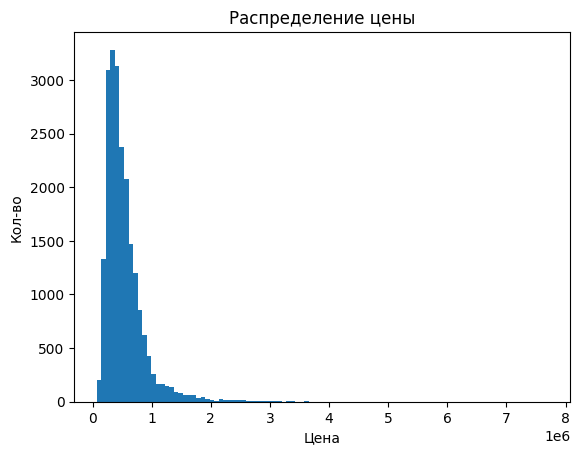

In [51]:
plt.hist(df['price'], bins=100)
plt.xlabel('Цена')
plt.ylabel('Кол-во')
plt.title('Распределение цены');

Основная масса домов имеет стоимость до 1 млн.

### 1.3
Изучите распределение квадратуры жилой

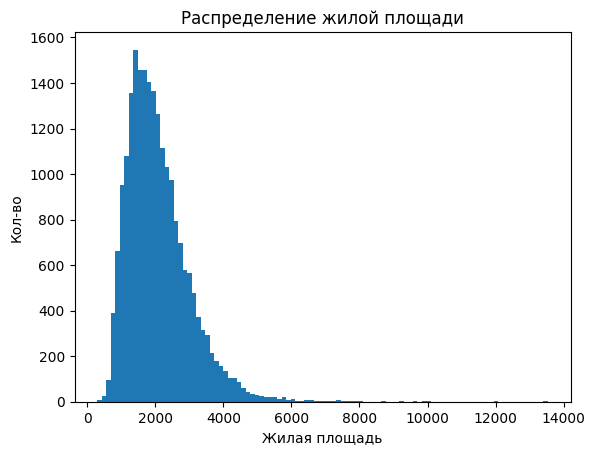

In [52]:
plt.hist(df['sqft_living'], bins=100)
plt.xlabel('Жилая площадь')
plt.ylabel('Кол-во')
plt.title('Распределение жилой площади');

Большинство домов в датафрейме имеют площадь от 1000 до 3000 квадратных футов.

### 1.4
Изучите распределение года постройки

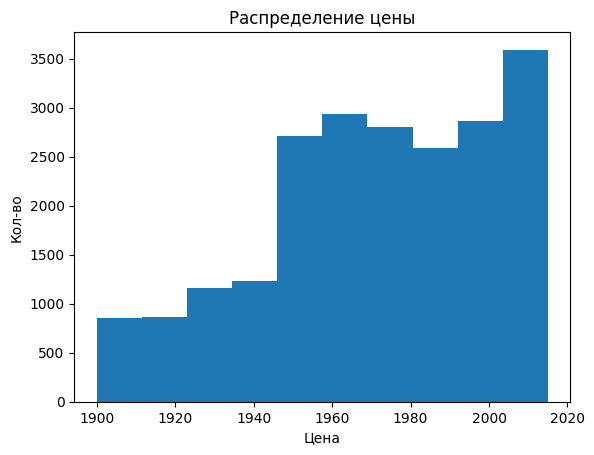

In [53]:
plt.hist(df['yr_built'], bins=10)
plt.xlabel('Цена')
plt.ylabel('Кол-во')
plt.title('Распределение цены');

Из графика видно, что после 1950 года объемы строительства значительно увеличились.

## Условие 2:
Постройте график
Сделайте выводы

### 2.1
Изучите распределение домов от наличия вида на набережную


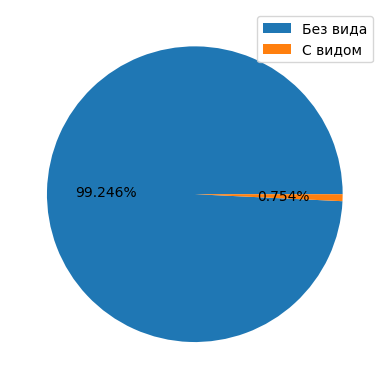

In [54]:
data_waterfront = df['waterfront'].value_counts()
plt.pie(data_waterfront.values, autopct='%1.3f%%')
plt.legend(('Без вида','С видом'));

Очень малая доля домов имеет вид на набережную.

### 2.2
Изучите распределение этажей домов

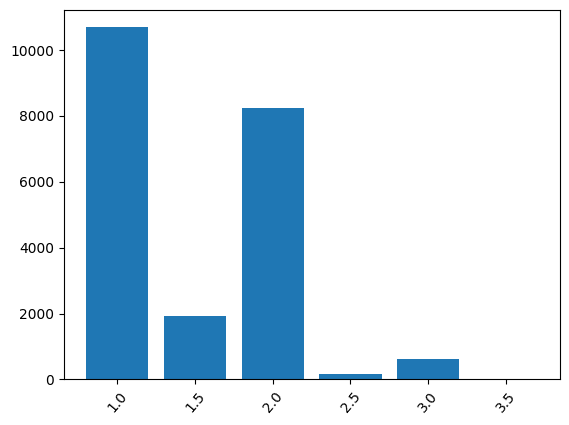

In [55]:
data_floor = df['floors'].value_counts()
plt.bar(data_floor.index, data_floor.values, width=0.4)
plt.xticks(rotation=50);

Основная масса домов - одно- и двух-этажные.

### 2.3
Изучите распределение состояния домов

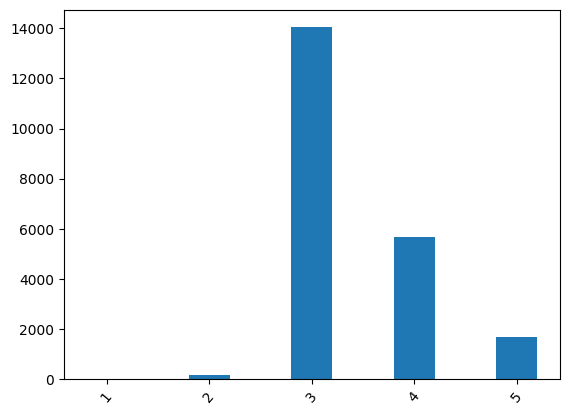

In [56]:
data_condition = df['condition'].value_counts()
plt.bar(data_condition.index, data_condition.values, width=0.4)
plt.xticks(rotation=50);


Основная масса домов в удовлетворительном и хорошем состоянии.

## Условие 3:
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

C:\Users\user\AppData\Local\Temp\ipykernel_3200\1469886726.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


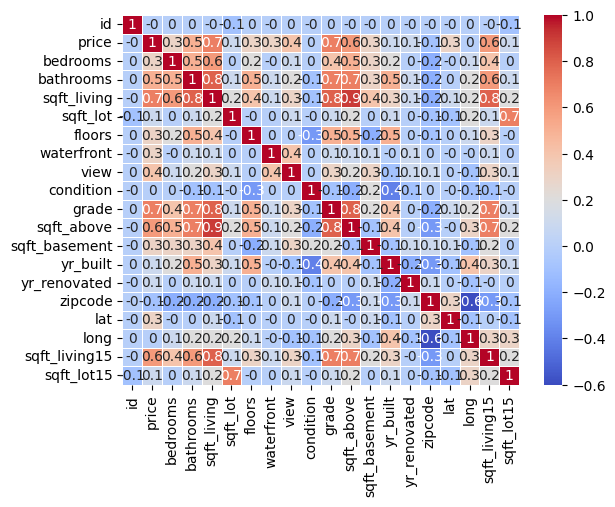

In [57]:
import numpy as np
import seaborn as sns

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
#corr_matrix[1]
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

### Матрица корреляции показывает существенную связь (0.5 ... 1) цены дома с:
* количеством ванных (bathrooms)
* жилой площадью (sqft_living)
* классом дома (grade)
* площадью этажей (sqft_above)
* площадью детских комнат (sqft_living15)

### Слабую связь (0.3 ... 0.5) цены дома с:
* количеством спален (bedrooms)
* количеством этажей (floors)
* видом на набережную (waterfront)
* видом из окна (view)
* площадью подвала (sqft_basement)
* географическим расположением - широнв (lat)

Остальные параметры имеют несущественное влияние на цену.



### Ниже приведены графики, отражающие взаимосвязь стоимости дома с наиболее влияющими параметрами:

* количеством ванных (bathrooms)
* жилой площадью (sqft_living)
* классом дома (grade)
* площадью этажей (sqft_above)
* площадью детских комнат (sqft_living15)

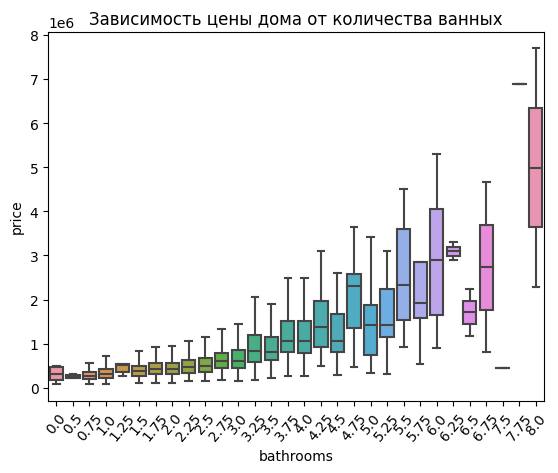

In [58]:
sns.boxplot(x=df['bathrooms'], y=df['price'], showfliers=False)
plt.title('Зависимость цены дома от количества ванных')
plt.xticks(rotation=50);

Действительно, наблюдается зависимость роста цены на дом с ростом количества ванных.

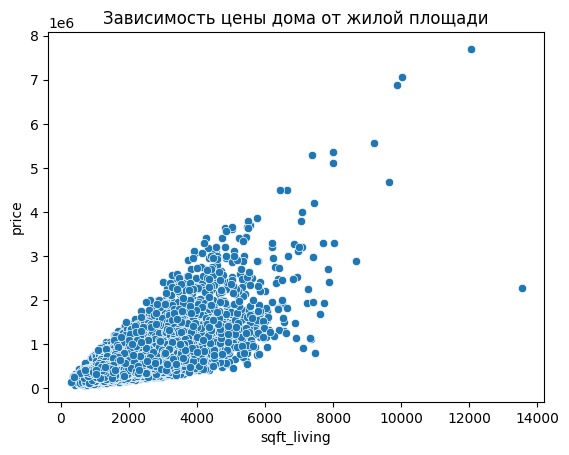

In [59]:
sns.scatterplot(x=df['sqft_living'], y=df['price'])
plt.title('Зависимость цены дома от жилой площади');


В распределении точек на графике видна взаимосвязь цены дома с его жилой площадью.

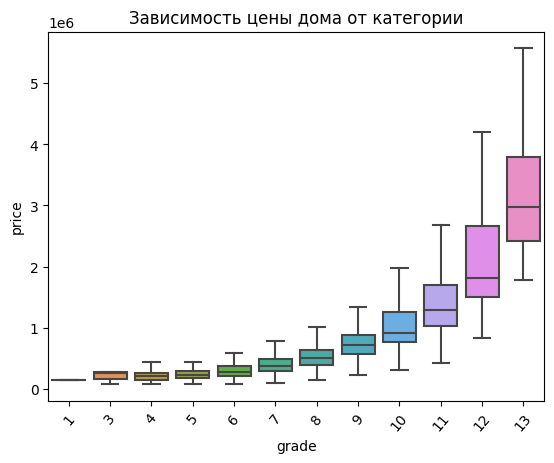

In [60]:
sns.boxplot(x=df['grade'], y=df['price'], showfliers=False)
#sns.boxplot(x=df['grade'], y=df['price'], showfliers=True)
plt.title('Зависимость цены дома от категории')
plt.xticks(rotation=50);

Наблюдается явная зависимость цены дома от его категории (класса).

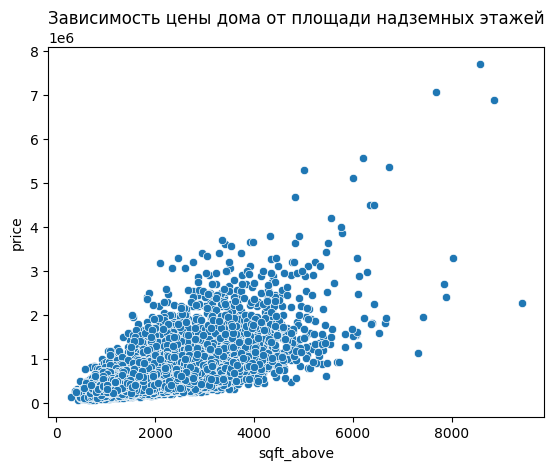

In [61]:
sns.scatterplot(x=df['sqft_above'], y=df['price'])
plt.title('Зависимость цены дома от площади надземных этажей');

По распределению точек на графике можно сделать предположение о взаимосвязи цены дома с площадью надземных этажей.

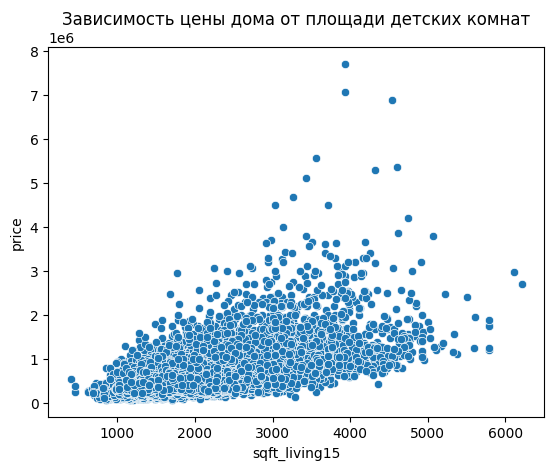

In [62]:
sns.scatterplot(x=df['sqft_living15'], y=df['price'])
plt.title('Зависимость цены дома от площади детских комнат');

По распределению точек на графике можно сделать предположение о взаимосвязи цены дома с площадью детских комнат.